Text(0, 0.5, 'weight (g)')

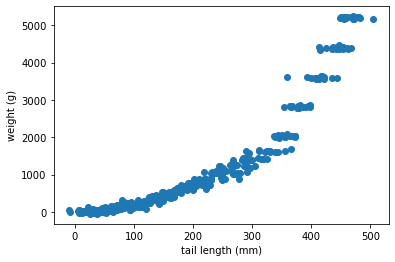

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A Regression to predict a kangaroo’s weight from its tail length
# A.1 Exploratory Data Analysis Tasks

kangaroo = pd.read_csv("2049681_kanga.csv")
kangaroo = np.array(kangaroo)
X = kangaroo[:,1].reshape(-1,1)
y = kangaroo[:,2].reshape(-1,1)


plt.scatter(X,y)
plt.xlabel("tail length (mm)")
plt.ylabel("weight (g)")


In [2]:
# A.2 Regression Tasks
# A.2-1

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=6, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.111, random_state= 6)

lr = LinearRegression().fit(X_train, y_train)

print("Accuracy score on test data: {:.2f}".format(lr.score(X_test, y_test)))

Accuracy score on test data: 0.80


In [3]:
# A.2-2
from sklearn.preprocessing import PolynomialFeatures

for i in range(2,6):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform(X_val)
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)

    score = lr_poly.score(X_val_poly,y_val)
    print("The score on validation set for degree {}: {}".format(i,score))
    
# The best performing degree of freedom is 3.

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

score = lr_poly.score(X_test_poly,y_test)
print("The score on test set for degree 3: {}".format(score))


The score on validation set for degree 2: 0.9576226975721638
The score on validation set for degree 3: 0.9613810697041024
The score on validation set for degree 4: 0.9613459445609823
The score on validation set for degree 5: 0.9600549485308228
The score on test set for degree 3: 0.964105018362105


In [4]:
# A.2-3
from sklearn.neighbors import KNeighborsRegressor
numbers = [1,3,6,10]
for n in numbers:
    knn_reg = KNeighborsRegressor(n_neighbors=n)
    knn_reg.fit(X_train, y_train)
    score = knn_reg.score(X_val, y_val)
    print("The score for {} nearest neighbors: {}".format(n,score))

# The best performing number of nearest neighbors is 6

knn_reg = KNeighborsRegressor(n_neighbors=6)
knn_reg.fit(X_train, y_train)
score = knn_reg.score(X_test, y_test)
print("The score on test set for 6 nearest neighbors: {}".format(score))

The score for 1 nearest neighbors: 0.9491966203156457
The score for 3 nearest neighbors: 0.9478949206489775
The score for 6 nearest neighbors: 0.9687309209168109
The score for 10 nearest neighbors: 0.963171229941701
The score on test set for 6 nearest neighbors: 0.9705271140409085


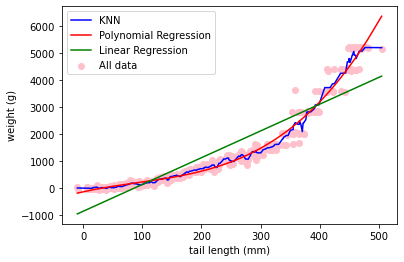

In [5]:
# A.2-4

plt.scatter(X,y,color="pink",label="All data")
X_sorted = np.sort(X,axis=0)

# Plot of KNN Regressor
plt.plot(X_sorted, knn_reg.predict(X_sorted),color="blue",label="KNN")

# Plot of Polynomial Regression
X_poly = poly.fit_transform(X_sorted)
plt.plot(X_sorted,lr_poly.predict(X_poly),color="red",label="Polynomial Regression")

# Plot of Linear Regression
plt.plot(X_sorted,lr.predict(X_sorted),color="g",label="Linear Regression")
plt.xlabel("tail length (mm)")
plt.ylabel("weight (g)")
plt.legend()

# KNN model is the best performing model

Text(0.5, 1.0, 'Histogram of Response variable')

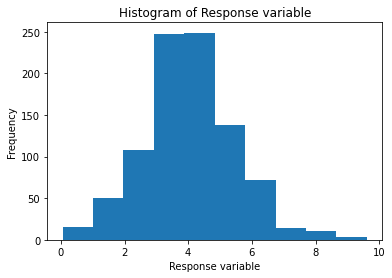

In [6]:
# B.1 Exploratory Data Analysis Tasks

# B.1-1

QSAR = pd.read_csv("qsar_fish_toxicity.csv",delimiter=",")
plt.hist(QSAR["response"])
plt.xlabel("Response variable")
plt.ylabel("Frequency")
plt.title("Histogram of Response variable")

# The target is normally distributed

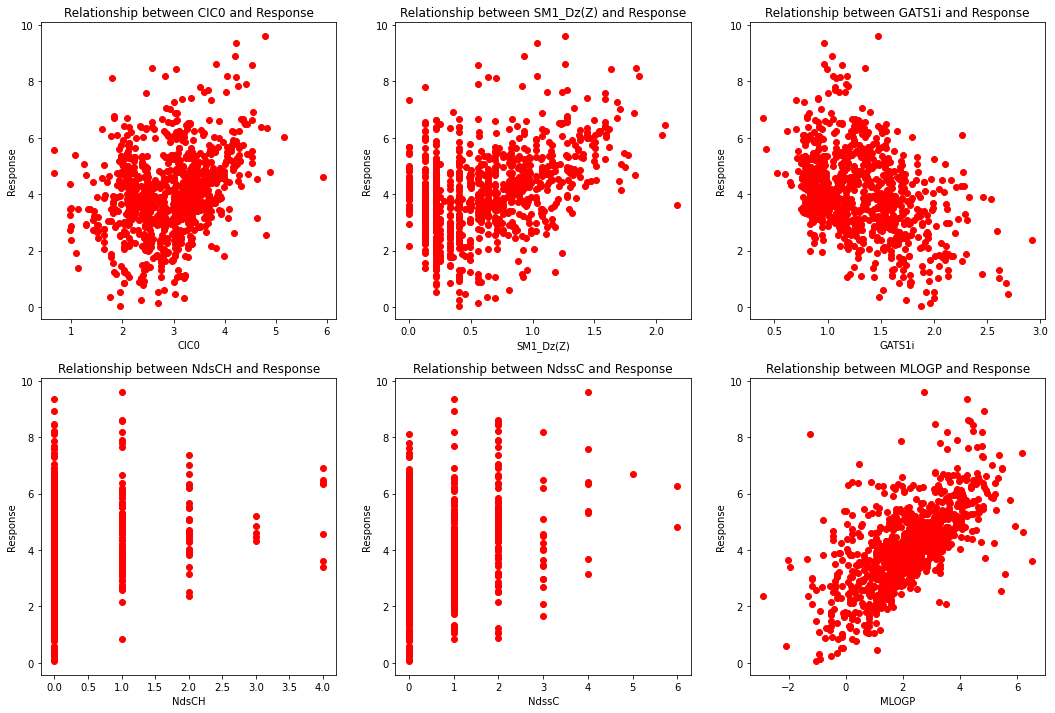

In [7]:
# B.1-2

names = list(QSAR.columns)
fig, ax = plt.subplots(figsize=(18,12), nrows=2, ncols=3)

i = 0
for row in range(2):
    for col in range(3):
        ax[row][col].scatter(QSAR.iloc[:,i],QSAR.iloc[:,-1],color="red")
        ax[row][col].set_xlabel(names[i])
        ax[row][col].set_ylabel("Response")
        ax[row][col].set_title("Relationship between {} and Response".format(names[i]))
        i += 1

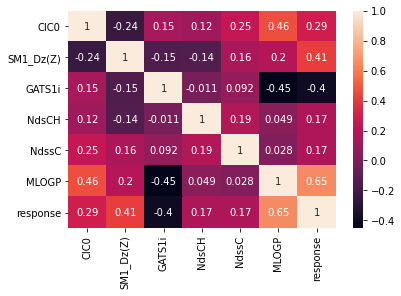

In [9]:
# B.1-3
import seaborn as sns
corr_matrx = QSAR.corr()
sns.heatmap(corr_matrx, xticklabels=corr_matrx.columns, yticklabels=corr_matrx.columns, annot=True)

# https://stackoverflow.com/questions/39409866/correlation-heatmap

In [11]:
# B.2 Regression Tasks

# B.2-1

y2 = QSAR.iloc[:,-1]
X2 = QSAR.iloc[:,:-1]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=64)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.111, random_state= 64)

lr2 = LinearRegression().fit(X2_train, y2_train)

print("Test set score: {:.2f}".format(lr2.score(X2_test, y2_test)))


Test set score: 0.64


In [12]:
# B.2-2

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

alpha = [0.001, 0.01, 0.1, 1, 10, 100]

reg_list = []

for i in alpha:
    ridge = Ridge(alpha=i).fit(X2_train, y2_train)
    reg_list.append(["Ridge Regression",i,ridge.score(X2_test, y2_test)])
    print("Validation set score: {:.2f} (Ridge alpha = {})".format(ridge.score(X2_val, y2_val),i))


# Best performing Ridge alpha value is 10
print()
ridge = Ridge(alpha=10).fit(X2_train, y2_train)
print("Test set score: {:.2f} (Ridge alpha = 10)".format(ridge.score(X2_val, y2_val)))
print()
    
for i in alpha:
    lasso = Lasso(alpha=i).fit(X2_train, y2_train)
    reg_list.append(["Lasso Regression",i,lasso.score(X2_test, y2_test)])
    print("Validation set score: {:.2f} (Lasso alpha = {})".format(lasso.score(X2_val, y2_val),i))
    
# Best performing Lasso alpha value is 0.01
print()
lasso = Lasso(alpha=0.01).fit(X2_train, y2_train)
print("Test set score: {:.2f} (Lasso alpha = 0.01)".format(lasso.score(X2_val, y2_val)))
print()

Validation set score: 0.58 (Ridge alpha = 0.001)
Validation set score: 0.58 (Ridge alpha = 0.01)
Validation set score: 0.58 (Ridge alpha = 0.1)
Validation set score: 0.58 (Ridge alpha = 1)
Validation set score: 0.59 (Ridge alpha = 10)
Validation set score: 0.58 (Ridge alpha = 100)

Test set score: 0.59 (Ridge alpha = 10)

Validation set score: 0.58 (Lasso alpha = 0.001)
Validation set score: 0.59 (Lasso alpha = 0.01)
Validation set score: 0.55 (Lasso alpha = 0.1)
Validation set score: 0.20 (Lasso alpha = 1)
Validation set score: -0.00 (Lasso alpha = 10)
Validation set score: -0.00 (Lasso alpha = 100)

Test set score: 0.59 (Lasso alpha = 0.01)



In [13]:
# B.2-3
col_names = ["Regression Type", "Alpha value", "R-squared score"]
dataset = pd.DataFrame(reg_list, columns=col_names)
print(dataset)

dataset.to_csv("S.DogancaCetin.csv", index=False)

     Regression Type  Alpha value  R-squared score
0   Ridge Regression        0.001         0.642486
1   Ridge Regression        0.010         0.642486
2   Ridge Regression        0.100         0.642485
3   Ridge Regression        1.000         0.642458
4   Ridge Regression       10.000         0.641025
5   Ridge Regression      100.000         0.607920
6   Lasso Regression        0.001         0.642479
7   Lasso Regression        0.010         0.641379
8   Lasso Regression        0.100         0.564838
9   Lasso Regression        1.000         0.194308
10  Lasso Regression       10.000        -0.001589
11  Lasso Regression      100.000        -0.001589
